In [ ]:
!pip install yfinance
!pip install mplfinance
!pip install finta

In [5]:
import datetime
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Liste des cryptos
symbols = ["ETH-USD", "BNB-USD", "XRP-USD", "SOL-USD", "ADA-USD", 
           "DOT-USD", "SHIB-USD", "LTC-USD", "AVAX-USD"]

# Dates
NUM_DAYS = 730  # 2 ans
start = datetime.date.today() - datetime.timedelta(days=NUM_DAYS)
end = datetime.datetime.today()

# Dictionnaire pour stocker les données
data_close = pd.DataFrame()

for symbol in symbols:
    data = yf.download(symbol, start=start, end=end, interval="1d")
    data_close[symbol] = data["Close"]

# Aperçu
data_close.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ETH-USD,BNB-USD,XRP-USD,SOL-USD,ADA-USD,DOT-USD,SHIB-USD,LTC-USD,AVAX-USD
Date,,,,,,,,,
2025-05-24,2530.646240,668.306519,2.332870,176.042404,0.747192,4.547797,0.000014,95.685890,22.977720
2025-05-25,2551.763916,669.916870,2.342975,175.725479,0.759983,4.525113,0.000014,95.657738,23.441710
2025-05-26,2564.138428,674.392639,2.310661,174.907898,0.759555,4.468652,0.000014,95.009216,23.072145
2025-05-27,2663.069824,687.159485,2.318672,176.815186,0.758683,4.537437,0.000014,95.964775,23.373484
2025-05-28,2634.868164,683.610168,2.276793,170.372696,0.749344,4.535145,0.000014,95.173393,23.115421


In [9]:
log_returns = np.log(data_close / data_close.shift(1))
log_returns = log_returns.dropna()  # Suppression des NaN
log_returns.tail()

,ETH-USD,BNB-USD,XRP-USD,SOL-USD,ADA-USD,DOT-USD,SHIB-USD,LTC-USD,AVAX-USD
Date,,,,,,,,,
2025-05-24,0.001663,0.018233,0.016662,0.012673,0.001087,-0.001500,0.000000,0.005718,-0.002267
2025-05-25,0.008310,0.002407,0.004322,-0.001802,0.016974,-0.005000,0.000000,-0.000294,0.019992
2025-05-26,0.004838,0.006659,-0.013888,-0.004663,-0.000563,-0.012556,0.000000,-0.006803,-0.015891
2025-05-27,0.037857,0.018754,0.003461,0.010845,-0.001149,0.015276,0.000000,0.010007,0.012976
2025-05-28,-0.010646,-0.005179,-0.018227,-0.037117,-0.012386,-0.000505,0.009841,-0.008281,-0.011102


In [11]:
# Paramètres
window = 30
rolling_corrs = []

# Création des matrices de corrélation glissantes
for i in range(window, len(log_returns)):
    window_corr = log_returns.iloc[i-window:i].corr()
    rolling_corrs.append(window_corr)

print(f"{len(rolling_corrs)} matrices créées.")

700 matrices créées.


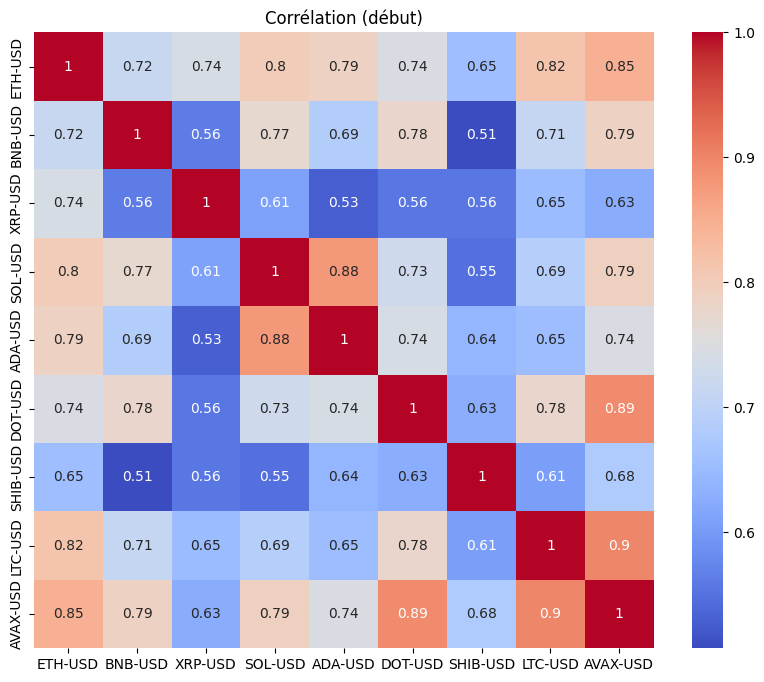

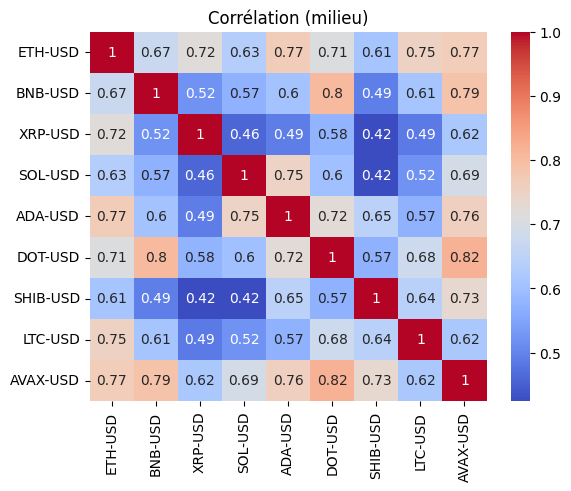

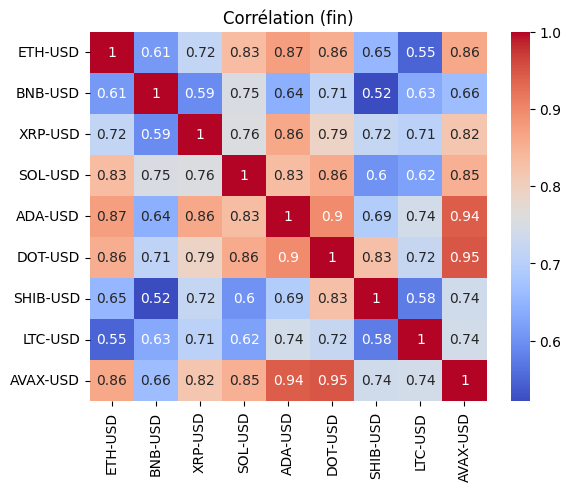

In [13]:
# Exemple : afficher la 1ère, la 10e et la dernière matrice
plt.figure(figsize=(10, 8))
sns.heatmap(rolling_corrs[0], annot=True, cmap="coolwarm")
plt.title("Corrélation (début)")
plt.show()

sns.heatmap(rolling_corrs[10], annot=True, cmap="coolwarm")
plt.title("Corrélation (milieu)")
plt.show()

sns.heatmap(rolling_corrs[-1], annot=True, cmap="coolwarm")
plt.title("Corrélation (fin)")
plt.show()

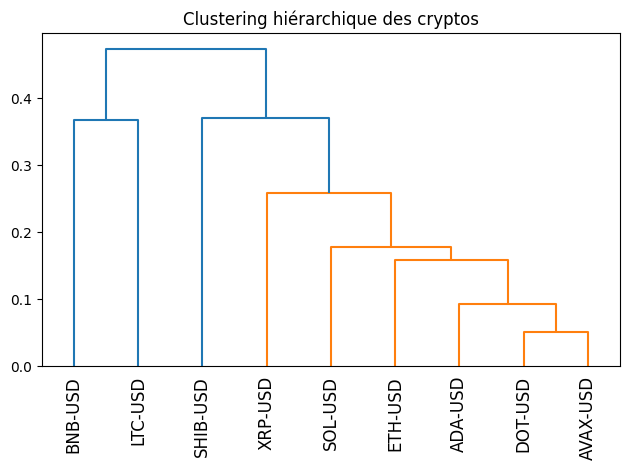

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Convertir la matrice de corrélation en matrice de distance
distance_matrix = 1 - latest_corr

# Conversion en format compatible avec linkage
condensed_dist = squareform(distance_matrix)

# Clustering
link = linkage(condensed_dist, method='ward')
dendrogram(link, labels=latest_corr.columns, leaf_rotation=90)
plt.title("Clustering hiérarchique des cryptos")
plt.tight_layout()
plt.show()

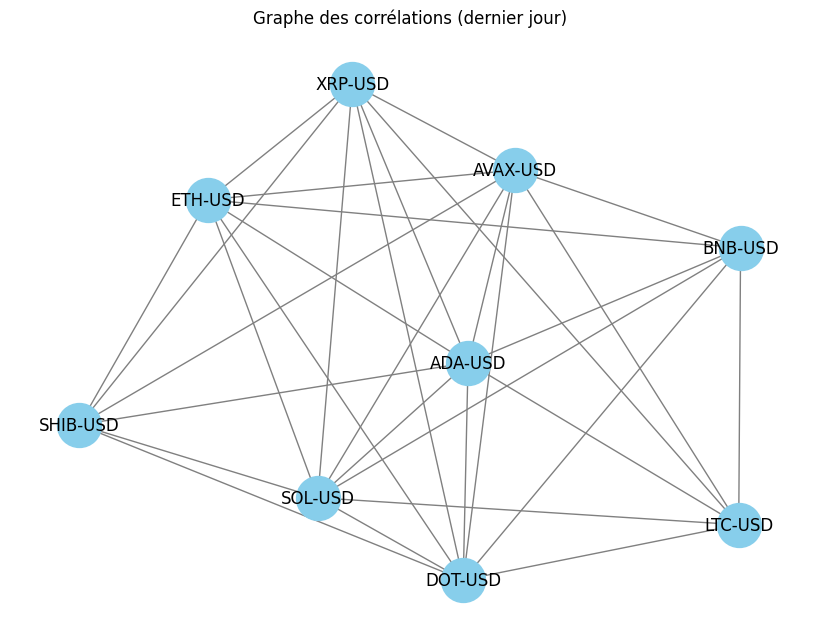

In [17]:
import networkx as nx

threshold = 0.6  # seuil de corrélation minimale pour une connexion

G = nx.Graph()

for i in latest_corr.columns:
    for j in latest_corr.columns:
        if i != j and latest_corr.loc[i, j] > threshold:
            G.add_edge(i, j, weight=latest_corr.loc[i, j])

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1000)
plt.title("Graphe des corrélations (dernier jour)")
plt.show()

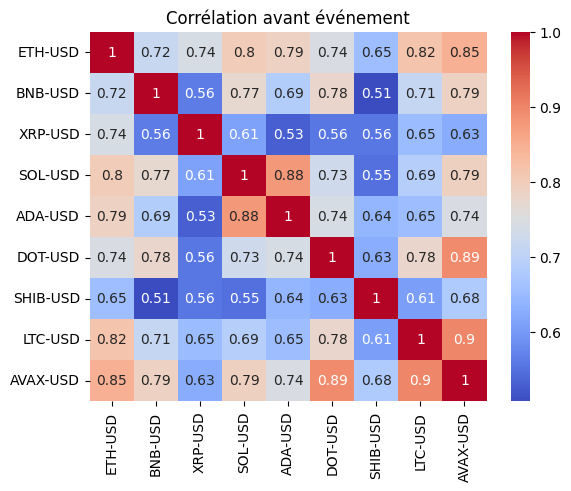

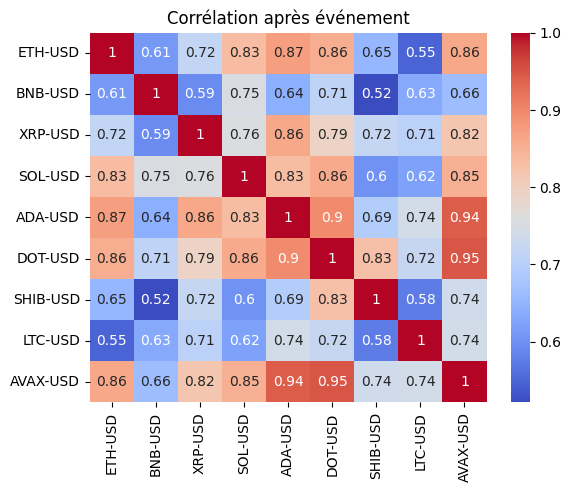

In [19]:
# Exemple : comparer début et fin de la période
sns.heatmap(rolling_corrs[0], annot=True, cmap="coolwarm")
plt.title("Corrélation avant événement")
plt.show()

sns.heatmap(rolling_corrs[-1], annot=True, cmap="coolwarm")
plt.title("Corrélation après événement")
plt.show()

In [21]:
# Export des log-returns
log_returns.to_csv("log_returns.csv")

# Export des corrélations finales
latest_corr.to_csv("last_correlation_matrix.csv")